### 问题一：收集数据并分析中国主要行业之间的相互影响，包括正向促进和负向制约对经济发展的作用

#### 导入numpy、pandas、matplotlib、seaborn的模块

In [22]:
# 导入相关模块
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 防止绘图中文乱码
mpl.rcParams['font.family'] = 'SimHei'  # 使用黑体
mpl.rcParams['axes.unicode_minus'] = False  # 正确显示负号
# 移除SettingWithCopyWarning警告
pd.options.mode.chained_assignment = None

#### 导入对应的各个产业数据

In [33]:
# 导入初始相关数据

df=pd.read_excel('../../data/近二十年各行业生产总值数据表.xlsx',sheet_name='Sheet1')
df


,年份,国民总收入,国内生产总值,第一产业,第二产业,第三产业,农林牧渔业,工业,建筑业,批发和零售业,交通运输、仓储和邮政业,住宿和餐饮业,金融业,房地产业,其他,人均国民总收入 (元),人均国内生产总值 (元)
0,2004,161415.4,161840.2,20904.3,74285.0,66650.9,21410.7,65774.9,8720.5,12455.8,9306.5,3664.8,6600.2,7152.1,26754.6,12454,12487
1,2005,185998.9,187318.9,21806.7,88082.2,77430.0,22416.2,77958.3,10400.5,13968.5,10668.8,4195.7,7486.0,8482.7,31742.1,14267,14368
2,2006,219028.5,219438.5,23317.0,104359.2,91762.2,24036.4,92235.8,12450.1,16533.4,12186.3,4792.6,9972.3,10320.9,36910.8,16707,16738
3,2007,270704.0,270092.3,27674.1,126630.5,115787.7,28483.7,111690.8,15348.0,20941.1,14605.1,5548.1,15200.0,13714.0,44561.5,20541,20494
4,2008,321229.5,319244.6,32464.1,149952.9,136827.5,33428.1,131724.0,18807.6,26186.2,16367.6,6616.1,18345.6,14600.3,53169.3,24250,24100
5,2009,347934.9,348517.7,33583.8,160168.8,154765.1,34659.7,138092.6,22681.5,29004.6,16522.4,6957.0,21836.8,18760.5,60002.6,26136,26180
6,2010,410354.1,412119.3,38430.8,191626.5,182061.9,39619.0,165123.1,27259.3,35907.9,18783.6,7712.0,25733.1,23326.6,68654.7,30676,30808
7,2011,483392.8,487940.2,44781.5,227035.1,216123.6,46122.6,195139.1,32926.5,43734.5,21842.0,8565.4,30747.2,27780.7,81082.2,35939,36277
8,2012,537329.0,538580.0,49084.6,244639.1,244856.2,50581.2,208901.4,36896.1,49835.5,23763.2,9536.9,35272.2,30751.9,93041.6,39679,39771
9,2013,588141.2,592963.2,53028.1,261951.6,277983.5,54692.4,222333.2,40896.8,56288.9,26042.7,10228.3,41293.4,35340.4,105847.3,43143,43497


In [34]:
# 获取列标题信息
df.columns

Index(['年份', '国民总收入', '国内生产总值', '第一产业', '第二产业', '第三产业', '农林牧渔业', '工业', '建筑业',
       '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他', '人均国民总收入 (元)',
       '人均国内生产总值 (元)'],
      dtype='object')

In [35]:
# 选择特定的列来创建一个新的DataFrame
df1 = df[['国内生产总值', '农林牧渔业', '工业', '建筑业', '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他']]
df2 = df[['国内生产总值', '农林牧渔业', '工业', '建筑业', '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他']]
# df1.head()

# 中英文列标题对照
# 绘图中英对照表
industry_names1 = {
    '国内生产总值': 'GDP',
    '农林牧渔业': 'Farming, Forestry,\n Livestock and Fishing',
    '工业': 'Industry',
    '建筑业': 'Construction',
    '批发和零售业': 'Wholesale and\nRetail Trade',
    '交通运输、仓储和邮政业': 'Transportation, Warehous-\ning, and Postal Services',
    '住宿和餐饮业': 'Accommodation and\nCatering',
    '金融业': 'Finance',
    '房地产业': 'Real Estate',
    '其他': 'Others'
}
# 分析中英对照表
industry_names2 = {
    '国内生产总值': 'GDP',
    '农林牧渔业': 'Farming_Forestry_Livestock_and_Fishing',
    '工业': 'Industry',
    '建筑业': 'Construction',
    '批发和零售业': 'Wholesale_and_Retail_Trade',
    '交通运输、仓储和邮政业': 'Transportation_Warehousing_and_Postal_Services',
    '住宿和餐饮业': 'Accommodation_and_Catering',
    '金融业': 'Finance',
    '房地产业': 'Real_Estate',
    '其他': 'Others'
}


# 使用映射将中文列标题转换为英文
df1.rename(columns=industry_names2, inplace=True)

df1.head()

,GDP,Farming_Forestry_Livestock_and_Fishing,Industry,Construction,Wholesale_and_Retail_Trade,Transportation_Warehousing_and_Postal_Services,Accommodation_and_Catering,Finance,Real_Estate,Others
0,161840.2,21410.7,65774.9,8720.5,12455.8,9306.5,3664.8,6600.2,7152.1,26754.6
1,187318.9,22416.2,77958.3,10400.5,13968.5,10668.8,4195.7,7486.0,8482.7,31742.1
2,219438.5,24036.4,92235.8,12450.1,16533.4,12186.3,4792.6,9972.3,10320.9,36910.8
3,270092.3,28483.7,111690.8,15348.0,20941.1,14605.1,5548.1,15200.0,13714.0,44561.5
4,319244.6,33428.1,131724.0,18807.6,26186.2,16367.6,6616.1,18345.6,14600.3,53169.3


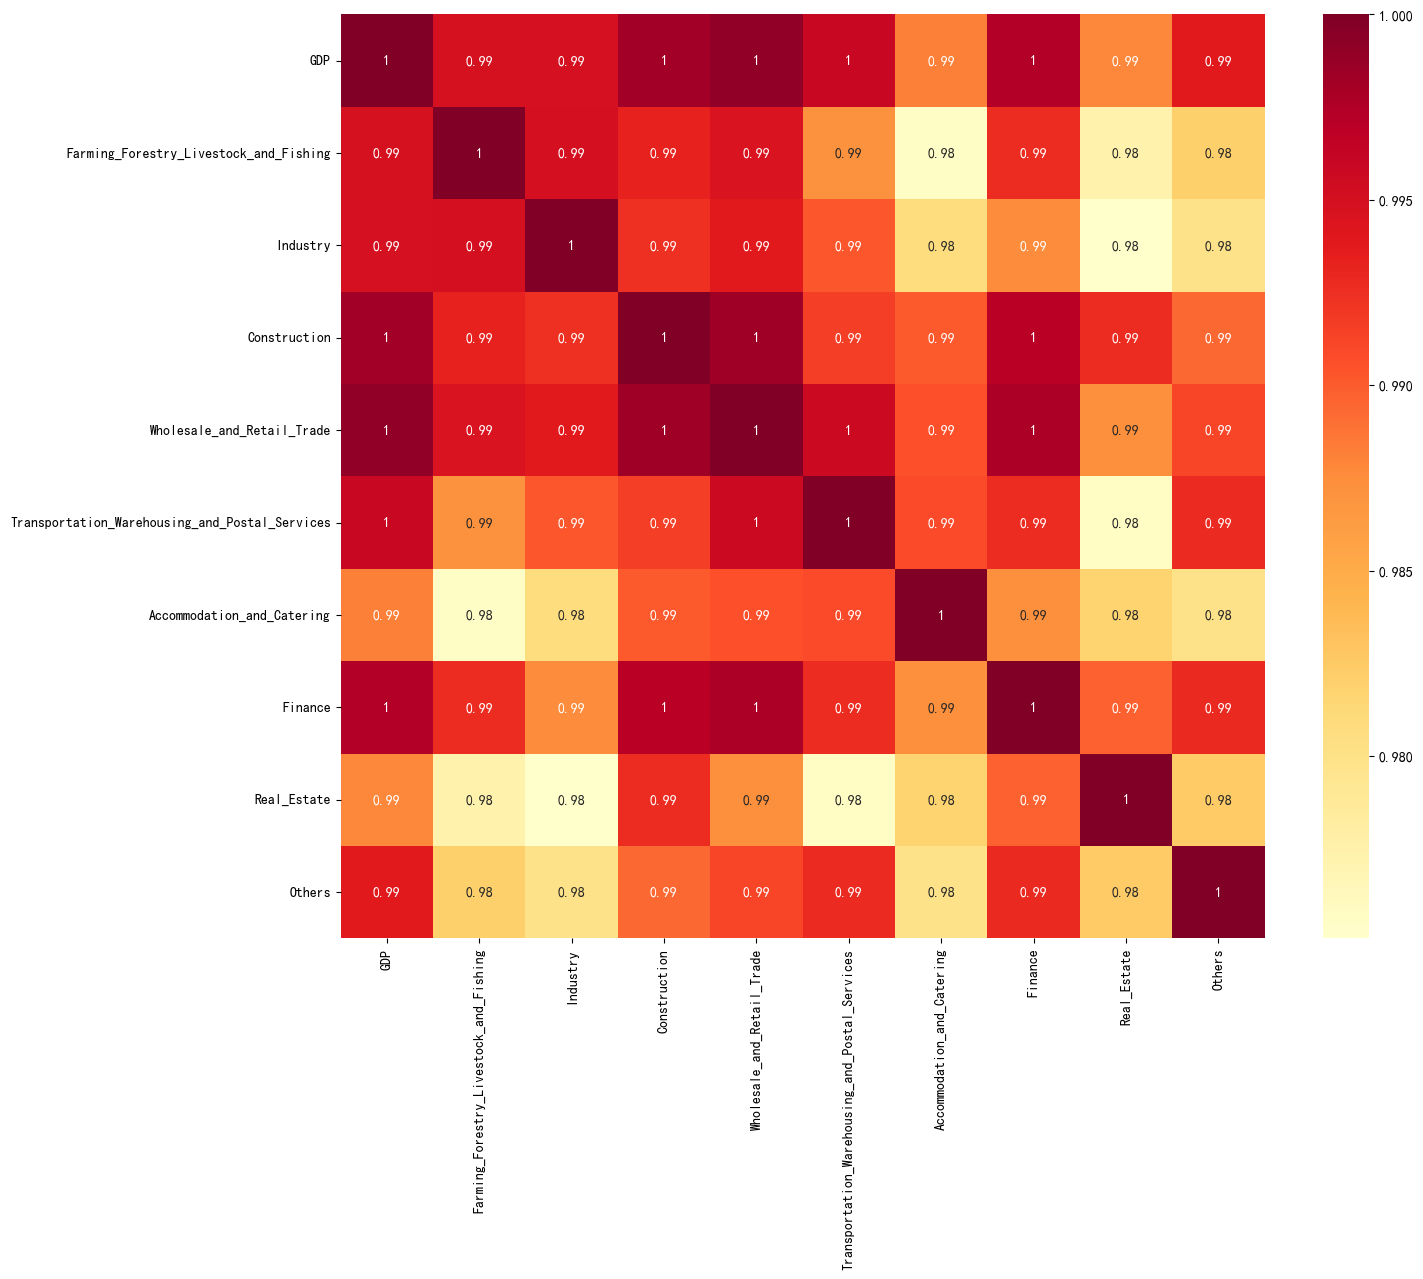

In [36]:
# 相关性分析1：根据经济的具体数值进行相关性分析

correlation_matrix = df1.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='YlOrRd')
# plt.title("Industry Correlation Matrix")
# 保存图像
plt.savefig("../../img/Industry_Correlation_Matrix.png", dpi=500)
plt.show()

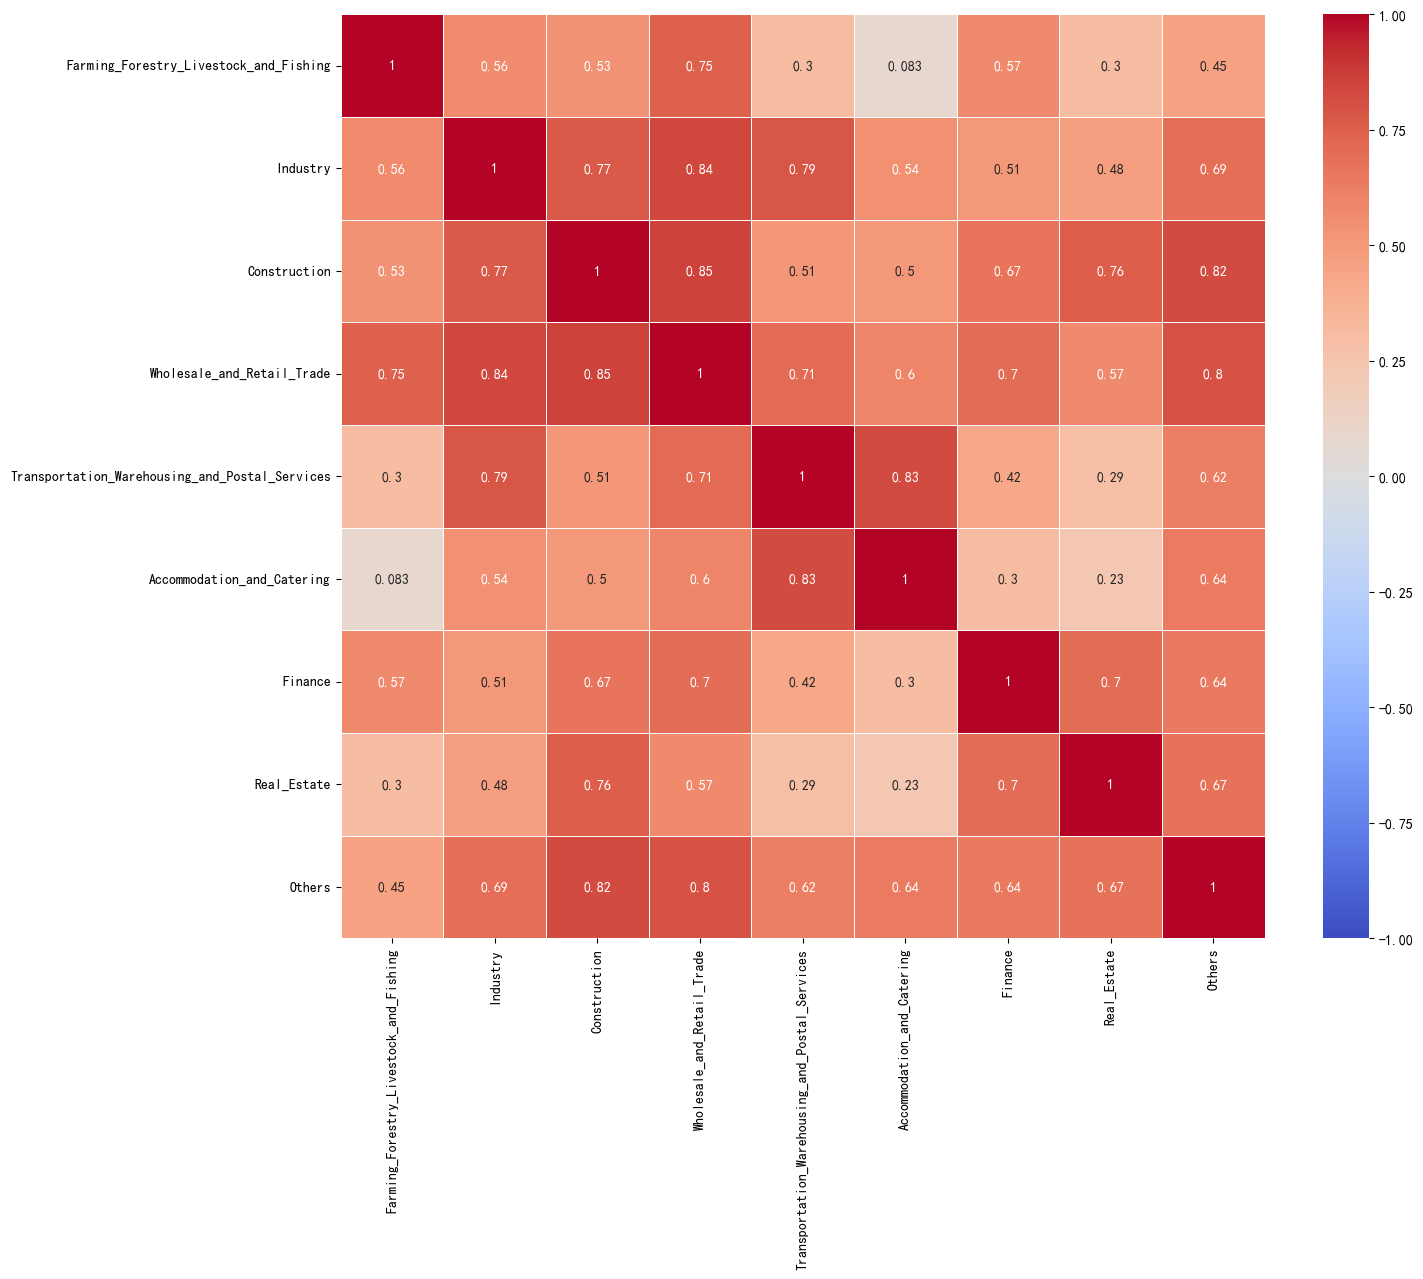

In [37]:
# 相关性分析2：根据经济的增长率数值进行相关性分析
# 去除GDP的影响
df1 = df1.drop(columns=['GDP'])

# 计算各行业的同比增长率
df_growth = df1.pct_change().dropna()

# 计算相关矩阵
correlation_growth = df_growth.corr()
# 保存相关系数数据
output_path = '../../data/相关系数.xlsx'
correlation_growth.to_excel(output_path)

# 绘制增长率的相关性热力图
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_growth, vmax=1, vmin=-1, square=True, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title("Growth Rate Correlation Matrix")
# 保存图像
plt.savefig("../../img/Growth_Rate_Correlation_Matrix.png", dpi=500)
plt.show()


#### OLS相关分析

In [28]:
from statsmodels.formula.api import ols

# 将列名转换为英文
df2.rename(columns=industry_names2, inplace=True)

# 构建模型，以'GDP'作为因变量，其他所有行业作为自变量
# 确保列名中的逗号和下划线被正确处理
model = ols('GDP ~ Farming_Forestry_Livestock_and_Fishing + Industry + Construction + Wholesale_and_Retail_Trade + Transportation_Warehousing_and_Postal_Services + Accommodation_and_Catering + Finance + Real_Estate + Others', data=df2).fit()

# 查看模型的详细结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 11 Jan 2025   Prob (F-statistic):                nan
Time:                        22:47:46   Log-Likelihood:                 158.57
No. Observations:                  10   AIC:                            -297.1
Df Residuals:                       0   BIC:                            -294.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

e:\python\environment\envs\sklearn-3.10.6\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
e:\python\environment\envs\sklearn-3.10.6\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
e:\python\environment\envs\sklearn-3.10.6\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
e:\python\environment\envs\sklearn-3.10.6\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
